# R-class 3 (2 hours) 

## Deliverable Ex. 1

###  Use tests to answer questions:  
  * Do the have the same mean?
  * Do they have the same variance?
  * Are they compatible with being the same distribution?
  
Ho = both distributions are equal

p(Ho) = p-val=1% => only 1% of the times we will have such a diffence in the means/variances by chance 
                    (diffence ~ real)
p(Ho) = p-val=90% => 90% of the times we will have such a difference in the means/variances by chance 
                    (diff ~not real) 

```
 P(Ho) = *.test$pvalue
 
```

**RANKS:**
    
```
    dat1r <-rank(dat12,ties.method="average")[1:N1]
    dat2r <-rank(dat12,ties.method="average")[(N1+1):N12]
```

In [4]:
# rank example
#dat1 <- floor(runif(10,0,20))
#dat2 <- floor(runif(10,0,20))
dat1 <- sample(0:50,10)
dat2 <- sample(0:50,10)
cat("dat1=",dat1,"\n")
cat("dat2=",dat2,"\n")

dat1= 4 13 2 33 30 24 37 3 50 35 
dat2= 38 7 30 27 47 32 25 37 10 46 


In [5]:
# previous calculations to compare ranks-by-hand and R-ranks
dat12 <- c(dat1,dat2)
dat12r <- rank(dat12,ties.method="average")
dat1r <- rank(dat12,ties.method="average")[1:10]
dat2r <- rank(dat12,ties.method="average")[11:20]

In [6]:
length(dat1)

[1] 10

In [3]:
dat12s <- sort(dat12)

cat("Doing ranks step by step...\n")
cat("=============================\n")
handmade <- rbind("dat12"=as.character(dat12), dat12s) # as.character only for display purposes
handmade
results <- data.frame("dat1_element"=dat12[1:10], "dat1_positions"=as.character(dat1r), 
                      "dat2_elements"=dat12[11:20], "dat2_positions"=as.character(dat2r))
results

cat("Using R ranks\n")
cat("=============================\n")
all <- rbind("dat12r"=as.character(dat12r)) # as.character only for display purposes
all
all1 <- rbind("dat1r"=as.character(dat1r), "dat2r"=as.character(dat2r))
all1

Doing ranks step by step...


dat12,14,17,16,3,10,6,0,25,11,29,3,25,39,34,26,42,1,17,19,11
dat12s,0,1,3,3,6,10,11,11,14,16,17,17,19,25,25,26,29,34,39,42


dat1_element,dat1_positions,dat2_elements,dat2_positions
<int>,<chr>,<int>,<chr>
14,9,3,3.5
17,11.5,25,14.5
16,10,39,19
3,3.5,34,18
10,6,26,16
6,5,42,20
0,1,1,2
25,14.5,17,11.5
11,7.5,19,13


Using R ranks


dat12r,9,11.5,10,3.5,6,5,1,14.5,7.5,17,3.5,14.5,19,18,16,20,2,11.5,13,7.5


dat1r,9,11.5,10,3.5,6,5,1,14.5,7.5,17
dat2r,3.5,14.5,19,18,16,20,2,11.5,13,7.5


**TESTS:**

    * USE 99% confidence level

    * F (isher) test: parametric test for the variance
        Use var.test -> use this for parametric tests
        
    * t (Student) test: parametric test for the mean 
        Two cases (sigmas are equal/different - aprox. Welch)
        Use t.test
        
       t.test(x, ..., alternative = ..., var.equal = ..., conf.level = ...)

    
    * Non-parametric test of the mean:
        wilcox.test (test U from Wilcoxon-Mann-Whitney over original data)
        
    * Test F over ranks: Variance tests for large N  
        Use var.test (over ranks)
        
    * Z-test: variance test for large N  
         p(Ho) = 1 - P(HA) = erfc(Z)  
        **Note**: install 'pracma' for erf() 
        
    * K-S test: compare the full distribution
        Use ks.test

# Minimization and model fitting
1. Function roots (unidimensional case):  
   * Polynomial roots: ```polyroot```  
   * Non-polynomial functions roots: ```uniroot```  
2. Maxima and minima searching (unidimensional): ```optimize```  
3. Fit of unidimensional functions to a straight line:  
   * Uni-parametric:   
       - By least squares: ```lm```  
       - Minimizing distances: ```optimize```   (optional)  
   * Multiparametric:``optim``

In [8]:
library(repr) # resize plots
# Change plot size to 4 x 4
options(repr.plot.width=5, repr.plot.height=5)

## 1. Function roots (unidimensional case)
### a) Polynomial roots: ``polyroot``

1.- $f(x) = 3 + 2 x + x^2 = 0$

2.- $f(x) = (x-3)(x-{1\over2})(x+{1\over2})(x+4) = 3 - {1\over4} x - {49 \over 4} x^2 + x^3 + x^4$  (class ex.)

Is it negative? FALSE 
[1] -1+1.414214i -1-1.414214i


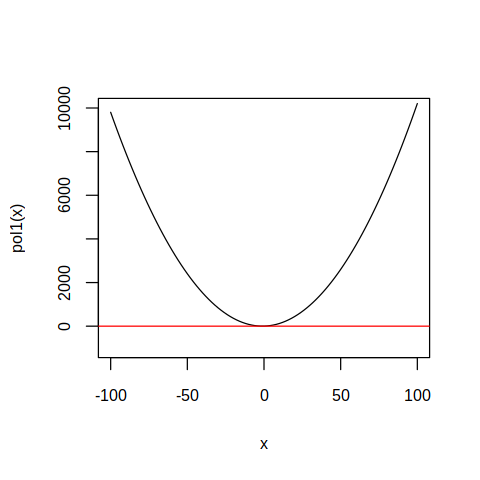

In [7]:
#Example 1
# simple way to check if polynomial becomes negative
pol1 <- function(x){  # define polynomial
    res <- 3 + 2*x + x^2
}    
x <- seq(-100,100,by=0.1)
cat("Is it negative?", any(pol1(x) < 0), "\n")   

#root calculation
zeros <- polyroot(c(3,2,1))   # look for roots
print(zeros)                  # no real roots; only complex roots

#plotting
options(repr.plot.width=4, repr.plot.height=4)
curve(pol1, xlim=c(-100,100),cex.axis=0.8, cex.lab=0.8, ylim=c(-1000,10000))
abline(h=0, col="red")

---
---
### CLASS EXERCISE: 

$f(x) = (x-3)(x-{1\over2})(x+{1\over2})(x+4) = 3 - {1\over4} x - {49 \over 4} x^2 + x^3 + x^4$

---
---

### b) Non-poynomial functions: ``uniroot``
* Function values must have opposite signs in both edges of the interval to ensure that at least one root exists in the interval (Bolzano Theorem)

* Search is done in a **given interval** of the unidimensional argument of the function: provide limits!
* It only finds one root

$f(x) = cos(x)-sin(2 x)$


$root
[1] 0.5235919

$f.root
[1] 1.034968e-05

$iter
[1] 8

$init.it
[1] NA

$estim.prec
[1] 6.103516e-05



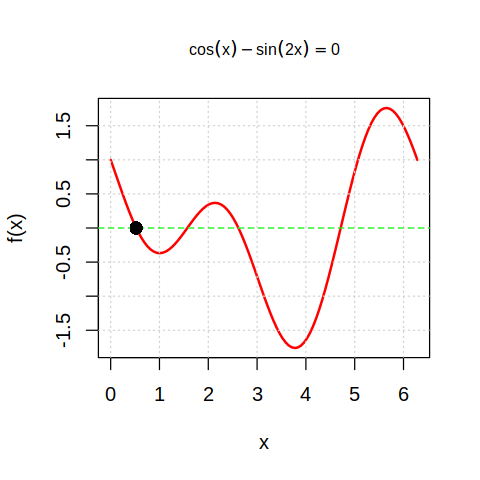

In [10]:
# define function
fcossin <- function(x) cos(x)-sin(2*x)
# plot it
curve(fcossin, col="red", xlim=c(0,2*pi),lwd=2, ylab="f(x)",
      main=expression(cos(x)-sin(2*x)==0), cex.main=0.8)
grid()
abline(h=0, col="green", lty=2)

# calculate first root in the interval [0,4]
zero <- uniroot(fcossin, lower=0, upper=4)
print(zero)

# plot result
points(zero$root, zero$f.root, pch=16, cex=1.5)


**Warning**: each call to ``uniroot`` only gives the **first** root! You must do as many call as roots you need to find (given the appropriate interval)

---
---
### CLASS EXERCISE: 

   Look for all the roots in 4 intervals

---
---

## 2. Maxima and minima search (unidimensional case)

* If the derivative is easy to calculate, then maxima/minima are the roots of the derivative (derivative=0)
* If the function is not unimodal (unique maximum/minimum) it cannot be assured that the maximum/minimum found is a global one
* If the derivative cannot be analitically calculated: **``optimize``**: ``optimize$maximum``, ``optimize$minimum``, ``optimize$objective`` (we need to define an interval to search)

Minimum:
$minimum
[1] 3.776457

$objective
[1] -1.760173

Maximum:
$maximum
[1] 5.648321

$objective
[1] 1.760173



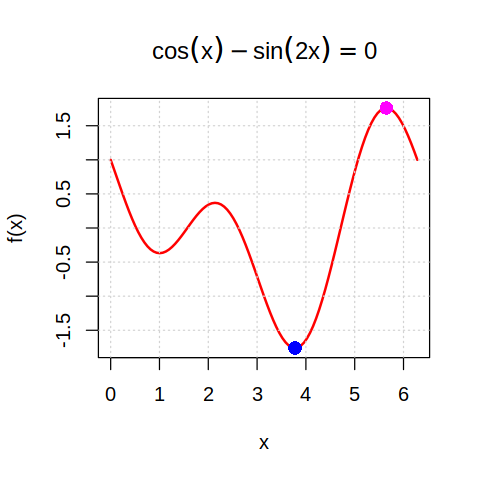

In [14]:
options(repr.plot.width=4, repr.plot.height=4)

# Use function above and plot it
interval = c(0,pi)
interval = c(0,3*pi)
curve(fcossin, col="red", xlim=c(0,2*pi), lwd=2, ylab="f(x)",main=expression(cos(x)-sin(2*x)==0))
grid()

# calculate extreme (by default it is a minimum)
extreme <- optimize(fcossin, lower=interval[1], upper=interval[2])
points(extreme$minimum, extreme$objective, pch=16, cex=1.5, col="blue")
cat("Minimum:\n")
print(extreme)

# calculate maximum
extreme <- optimize(fcossin, lower=interval[1], upper=interval[2], maximum=TRUE)
points(extreme$maximum, extreme$objective, pch=16, cex=1.5, col="magenta") # it is not a global maximum
cat("Maximum:\n")
print(extreme)


## 3. Fit of unidimensional functions to a straight line (least squares fit)

### a) Using ``lm``

Let's fit a straight line to a sample of data in the file *hubble_data.txt* (on line platform "Aula Virtual").

The formula to use in **``lm``** can be:

$y \sim x$ for $ y = ax + b$
    
$y \sim x-1$ for $y = ax$

$y \sim 0 + x$ for $y = ax$

$y \sim 1$ for $y = ct$

In addition, errors can be taken into account in the fit (```weight``` = 1/var)

'data.frame':	24 obs. of  2 variables:
 $ distance          : num  0.032 0.034 0.214 0.263 0.275 0.275 0.45 0.5 0.5 0.63 ...
 $ recession.velocity: int  170 290 -130 -70 -185 -220 200 290 270 200 ...



Call:
lm(formula = hubble$recession.velocity ~ hubble$distance - 1)

Coefficients:
hubble$distance  
          423.9  



Call:
lm(formula = hubble$recession.velocity ~ hubble$distance - 1)

Residuals:
   Min     1Q Median     3Q    Max 
-411.5 -191.3   -7.1  128.0  496.1 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
hubble$distance   423.94      42.15   10.06 6.87e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 229 on 23 degrees of freedom
Multiple R-squared:  0.8147,	Adjusted R-squared:  0.8067 
F-statistic: 101.1 on 1 and 23 DF,  p-value: 6.869e-10


hubble$distance 
       423.9373 


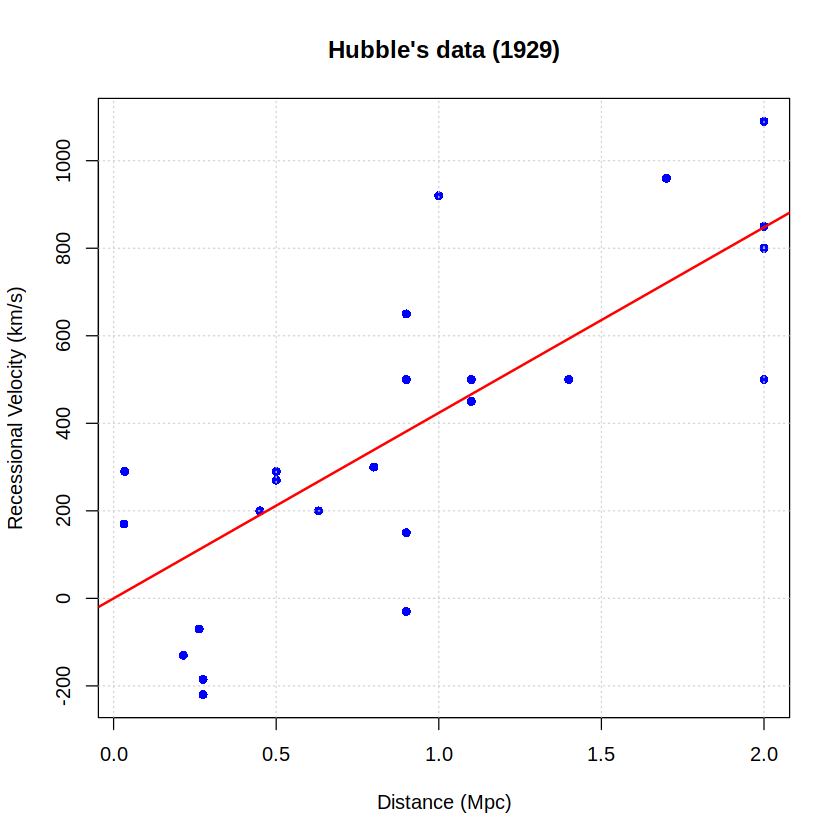

In [1]:
# read data 
hubble <- read.table("hubble_data.txt", header=TRUE,skip = 0)
str(hubble)

# plot data
plot(hubble, pch=16, col="blue", main="Hubble's data (1929)", 
     xlab="Distance (Mpc)", ylab="Recessional Velocity (km/s)")
grid()

# fit to a straight line using lm(..)
fit_lm <- lm(hubble$recession.velocity ~ hubble$distance-1) 
fit_lm
summary(fit_lm)
# show slope fitted value
print(fit_lm$coefficients)
#hubble$distance
# plot fit line
abline(fit_lm, col="red", lwd=2)

### b) Alternative: Minimizing distances +  ```optimize```
We can have the same result using ``optimize``: create a function (sum of the squares of the distances to the line) that will be minimized and then look for the value of the minimizing slope

Minimum slope reached at: [1] 423.9373


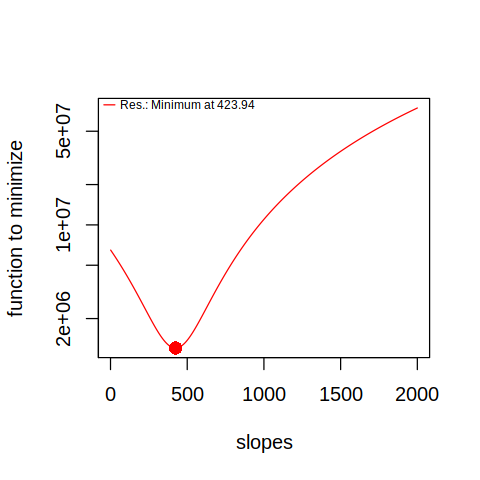

In [21]:
# function to minimize the sum of the distances, squared
fun.sum.residuals <- function(slope,x,y) {
    output <- sum((y-x*slope)^2)
    return(output)
}
# check slopes in [0,2000]
max.slope <- 2000
test.slopes <- numeric(max.slope)
residuals <- numeric(max.slope)
for (i in 1:max.slope) {
    test.slopes[i] <- i
    residuals[i] <- fun.sum.residuals(test.slopes[i], x=hubble$distance, y=hubble$recession.velocity)
}

# plot residuals for every value of the slope
plot(test.slopes, residuals, type="l", col="red", log="y", 
     xlab="slopes", ylab="function to minimize")

# calculate slope that minimize fun.sum.residuals
#        default: maximum=FALSE
#        otther remaining parameters needed (no to be minimized): x,y
opt <- optimize(fun.sum.residuals, lower=0, upper=1000,  x=hubble$distance, y=hubble$recession.velocity)
points(opt$minimum, opt$objective, pch=16, cex=1.5, col="red")
cat("Minimum slope reached at: ")
print(opt$minimum)

# plot legend
legend("topleft",  paste("Res.: Minimum at",round(opt$minimum,2)),
       lty=1,col=c("red","blue"), cex=0.6, bty="n")

---
---
### CLASS EXERCISE: 
Minimize the absolute value of the sum of the distances (instead of the sum of the squares of the distances) and plot the results in the same plot than the least squares minimization.
   

---
---

## 4. Fit to a unidimensional function (multiparametric)
To fit a function with more than 1 parameter, we can use the generic function **```optim```**. Warning! Do not confuse with **```optimize```**.

- Using this function requires having an initial approximated solution. 

- **```optim```** can use different methods to estimate the minimum. By default this is Nelder-Mead (1965), which only requires be able to calculate the function in several points (it is a robust method although it can be slow). More sofisticated methods need an evaluation of the function gradient.

- We will fit $f(x) = p_1 cos(p_2x) + p_2sin(p_1x)$

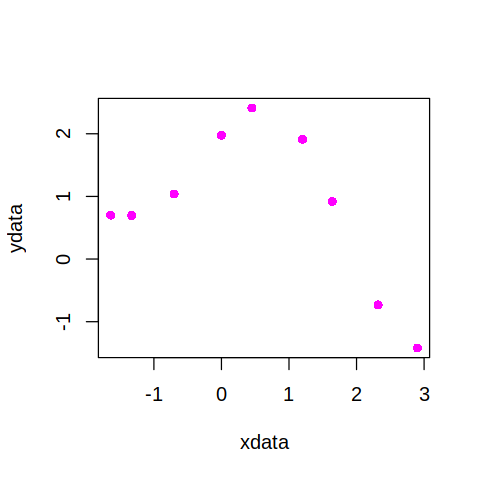

In [24]:
#                        PLOT DATA
# read data to be fitted
data <- read.table("dataOptize.txt", header=TRUE)
xdata <- data[,1]
ydata <- data[,2]
# have a look at it
plot(xdata,ydata,pch=16,col="magenta")

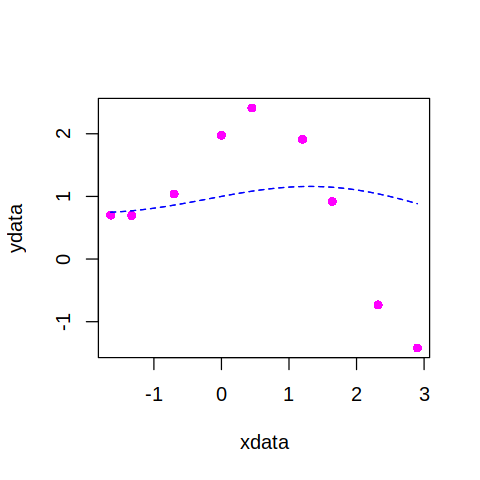

In [27]:
#           PLOT DATA + FUNCTION (with initial guesses)
plot(xdata,ydata,pch=16,col="magenta")
# initial function to be fitted (note that function returns a vector)
funp1p2 <- function(x,p1,p2) {
    f <- p1*cos(p2*x)+p2*sin(p1*x)
    return(f)
}
# some starting values + plot function for this selection
p1_init = 1.0
p2_init = 0.2
xp <- seq(min(xdata),max(xdata),length.out=1000)
yp <- funp1p2(xp,p1_init,p2_init)
lines(xp, yp, col="blue", lty=2)
# also with 'curve'
curve(funp1p2(x,p1_init,p2_init), add=TRUE, col="blue", lty=2)

![No image, sorry](optim_movie.gif)

---
---
### CLASS EXERCISE: 

- Fit Hubble data to a line using optim (not adequate - 1 dim-, but possible)

Warning message in optim(c(p1_init), fun.to.minimize, x = xdata, y = ydata):
“one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly”


$par
[1] 423.9062

$value
[1] 1206403

$counts
function gradient 
      32       NA 

$convergence
[1] 0

$message
NULL

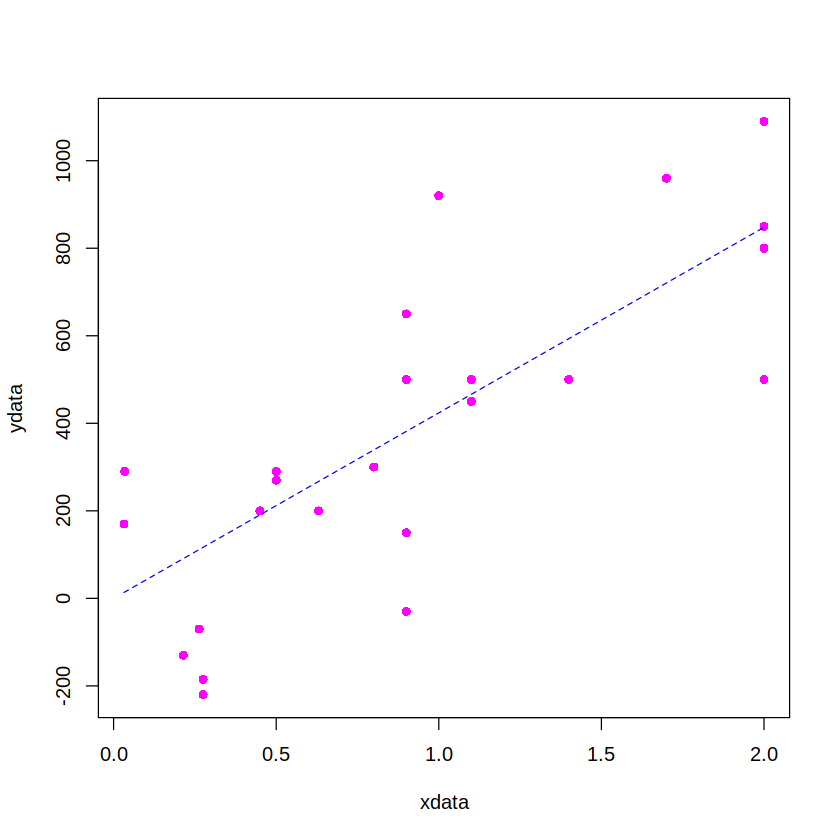

In [1]:
# read data 
hubble <- read.table("hubble_data.txt", header=TRUE)

xdata <- hubble[,1]
ydata <- hubble[,2]

#           PLOT DATA + FUNCTION (with initial guesses)
plot(xdata,ydata,pch=16,col="magenta")

# initial function to be fitted (note that function returns a vector)
funp1 <- function(x,p1) {
    f <- p1*x
    return(f)
}
# some starting values + plot function for this selection
p1_init = 100.0

fun.to.minimize <- function(params,x,y) {
    p1 <- params[1]
    output <- sum((y-funp1(x,p1))^2)
    return(output)
}

fit_optim <- optim(c(p1_init), fun.to.minimize, x=xdata, y=ydata)
afit <- fit_optim$par[1]

xp <- seq(min(xdata),max(xdata),length.out=1000)
yp <- funp1(xp,afit)
lines(xp, yp, col="blue", lty=2)

fit_optim

## ---
---
### CLASS EXERCISE: fit to ~Gaussian line

1. Create 40 points between 3.4 and 5.2 following a Gaussian density curve (mean=4.27, sigma=0.34)

2. Move points "y" value a random quantity between -20% and 20% (uniform)

3. Give them an error = sqrt(y)/10

4. Plot points (with error bars) and the "theoretical" initial curve from which points are derived

5. Fit a gaussian minimizing $\chi^2$

6. Add fit plot

In [41]:
#install.packages("Hmisc")
library(Hmisc)

# Create 40 points between 3.4 and 5.2 following a Gaussian density curve (mean=4.27, sigma=0.34)
xdata <- seq(3.4,5.2,length.out=40)
ydata0 <- dnorm(xdata,mean=4.27,sd=0.34)

# Move points "y" value a random quantity between -20% and 20% (uniform)
rn <- runif(length(xdata),min=-0.2,max=0.2)
ydata <- (1 + rn) * ydata0

erry <- runif(length(xdata),0.02,0.05)

# Plot points (with error bars) and the "theoretical" initial curve from which points are derived
# errbar(x=xdata,y=ydata,yplus=ydata+erry, yminus=ydata-erry)
#curve(dnorm(x,mean=4.27,sd=0.34), col="red", add=T) # theoretical curve

Real data: mean = 4.27, sd = 0.34
 mu =  4.270609 ,
 sigma =  0.3541865 
Chisq =  239.8813 


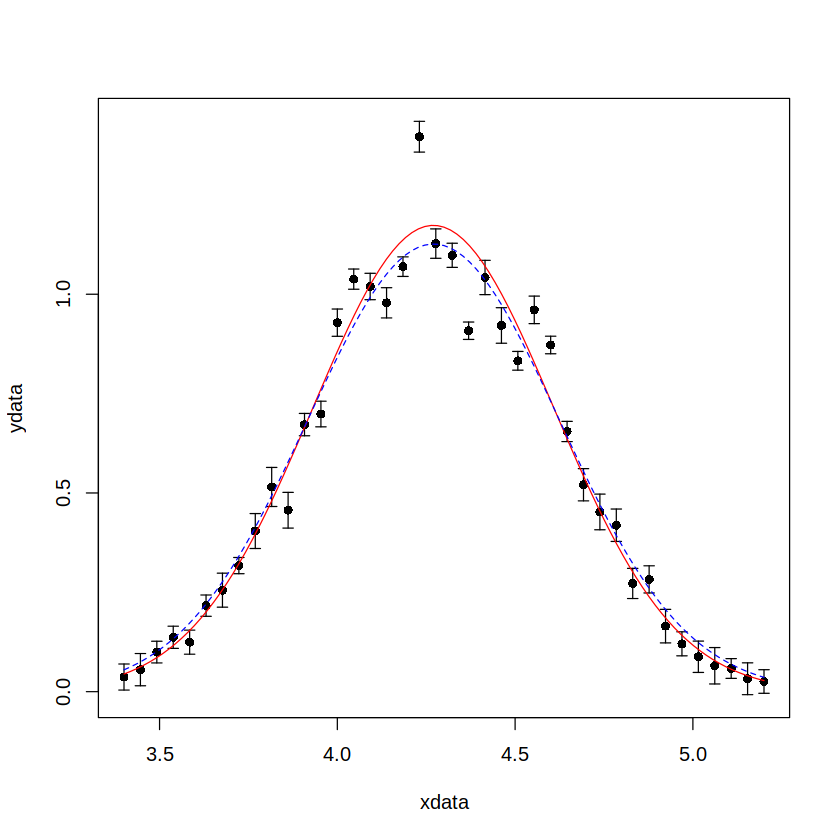

In [42]:
fun.to.fit <- function(x, mu, sigma){
    1/(sigma*sqrt(2*pi))*exp(-0.5*(x-mu)**2/sigma**2)
}

fun.to.minimize <- function(coefs,x,y){
    mu0 <- coefs[1]
    sigma0 <- coefs[2]
    out <- sum( (y-fun.to.fit(x,mu0,sigma0))**2/erry**2 )
}

# N0 obtained for the previous fit
mu0 <- 4
sigma0 <- 0.3

fit_optim <- optim(c(mu0,sigma0), fun.to.minimize, x=xdata, y=ydata)

afit <- fit_optim$par[1]
bfit <- fit_optim$par[2]

cat("Real data: mean = 4.27, sd = 0.34\n")
cat(" mu = ",afit,",\n sigma = ",bfit,"\n")

# We get the chisq and the degrees of freedom
chi <- sum((ydata-fun.to.fit(xdata,afit,bfit))**2/erry**2)
cat("Chisq = ",chi,"\n")


# Plot points (with error bars) and the "theoretical" initial curve from which points are derived
errbar(x=xdata,y=ydata,yplus=ydata+erry, yminus=ydata-erry)
curve(dnorm(x,mean=4.27,sd=0.34), col="red", add=T) # theoretical curve
curve(fun.to.fit(x,afit,bfit), add = TRUE, col='blue',lty=2)

## Example: Fitting a polynomial to the data with optim

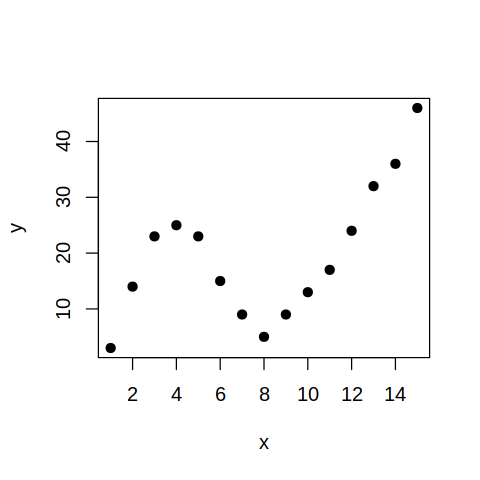

In [60]:
options(repr.plot.width=4, repr.plot.height=4)
x <- 1:15
y <- c(3,14,23,25,23,15,9,5,9,13,17,24,32,36,46)

plot(x,y,pch=19,xlab='x',ylab='y')

[1]  0.59784596  1.46558267  1.88771919 -0.33186138  0.01434109

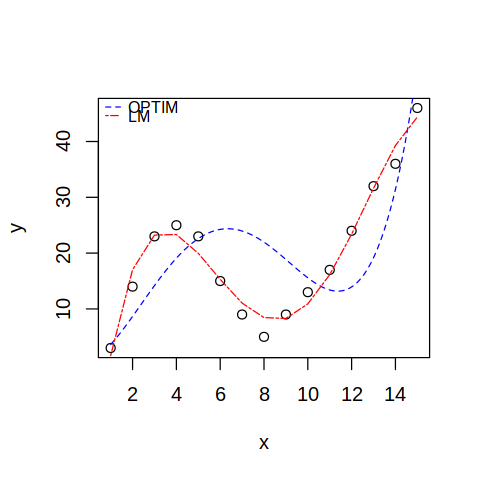

In [65]:
fit_lm <- lm( y~poly(x,4,raw=TRUE) )

fun.to.fit <- function(x, a, b,c,d,e){
    a + b*x + c*x^2 + d*x**3 +e*x**4
}

fun.to.minimize <- function(coefs,x,y){
    a <- coefs[1]
    b <- coefs[2]
    c <- coefs[3]
    d <- coefs[4]
    e <- coefs[5]
    out <- sum((y-fun.to.fit(x,a,b,c,d,e))^2)
}

a0 <- 1
b0 <- 1
c0 <- 1
d0 <- 1
e0 <- 1
fit_optim <- optim(c(a0,b0,c0,d0,e0), fun.to.minimize, x=x, y=y)
afit <- fit_optim$par[1]
bfit <- fit_optim$par[2]
cfit <- fit_optim$par[3]
dfit <- fit_optim$par[4]
efit <- fit_optim$par[5]
fit_optim$par

plot(x,y)
curve(fun.to.fit(x,afit,bfit,cfit,dfit,efit),add=TRUE, col='blue',lty=2)
lines(x,predict(fit_lm,data.frame(x=x)),col="red", lty=6)
legend("topleft", c("OPTIM", "LM"), lty=c(2,6), col=c("blue","red"), cex=0.8, bty='n')

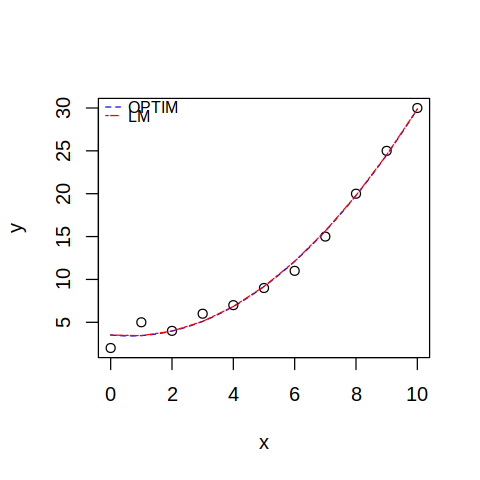